# **Predict the Success of Bank telemarketing**

The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Columns Description
- **last contact date**: last contact date
- **age**:   - **last contact date** : last contact date
- **age** : age (numeric)
- **job** : type of job
- **marital** : marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
- **education** : education level (categorical: "unknown", "secondary", "primary", "tertiary")
- **default** : has credit in default? (binary: "yes", "no")
- **balance** : average yearly balance, in euros (numeric)
- **housing** : has housing loan? (binary: "yes", "no")
- **loan** : has personal loan? (binary: "yes", "no")
- **contact** : contact communication type (categorical: "unknown", "telephone", "cellular")
- **duration** : last contact duration, in seconds (numeric)
- **campaign** : number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays** : number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- **previous** : number of contacts performed before this campaign and for this client (numeric)
- **poutcome** : outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

**Output variable (desired target):**
- **target** : has the client subscribed to a term deposit? (binary: "yes", "no")


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing libraries
In the below cell all the relevent libraries for the project are imported

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np # linear algebraq
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data loading
The data shared by the competition is loaded below

In [3]:
df_train = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
df_train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [4]:
df_test=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")
df_test.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [5]:
sample = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv')
sample.head()

,id,target
0,0,no
1,1,no
2,2,no
3,3,yes
4,4,yes


# Exploratory Data Analysis
All the descriptive statistics and visualization will be done in this section

In [6]:
df_train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [9]:
df_test.describe()

,age,balance,duration,campaign,pdays,previous
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.261200,5328.789200,437.117700,5.159700,71.705700,12.028100
std,12.650137,15944.545194,761.232963,9.975928,160.374253,44.467155
min,18.000000,-3372.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,92.000000,108.000000,1.000000,-1.000000,0.000000
50%,40.000000,541.000000,196.000000,2.000000,-1.000000,0.000000
75%,50.000000,2051.000000,380.000000,4.000000,-1.000000,0.000000
max,94.000000,101418.000000,4909.000000,63.000000,871.000000,275.000000


### Different types of features

In [10]:
binary_features=['housing','loan','default']
multi_cat_features=['job','education','marital','contact','poutcome']
quantitative=['age','campaign','duration','previous','pdays','balance']

### Pie Charts of distribution of categorical variables

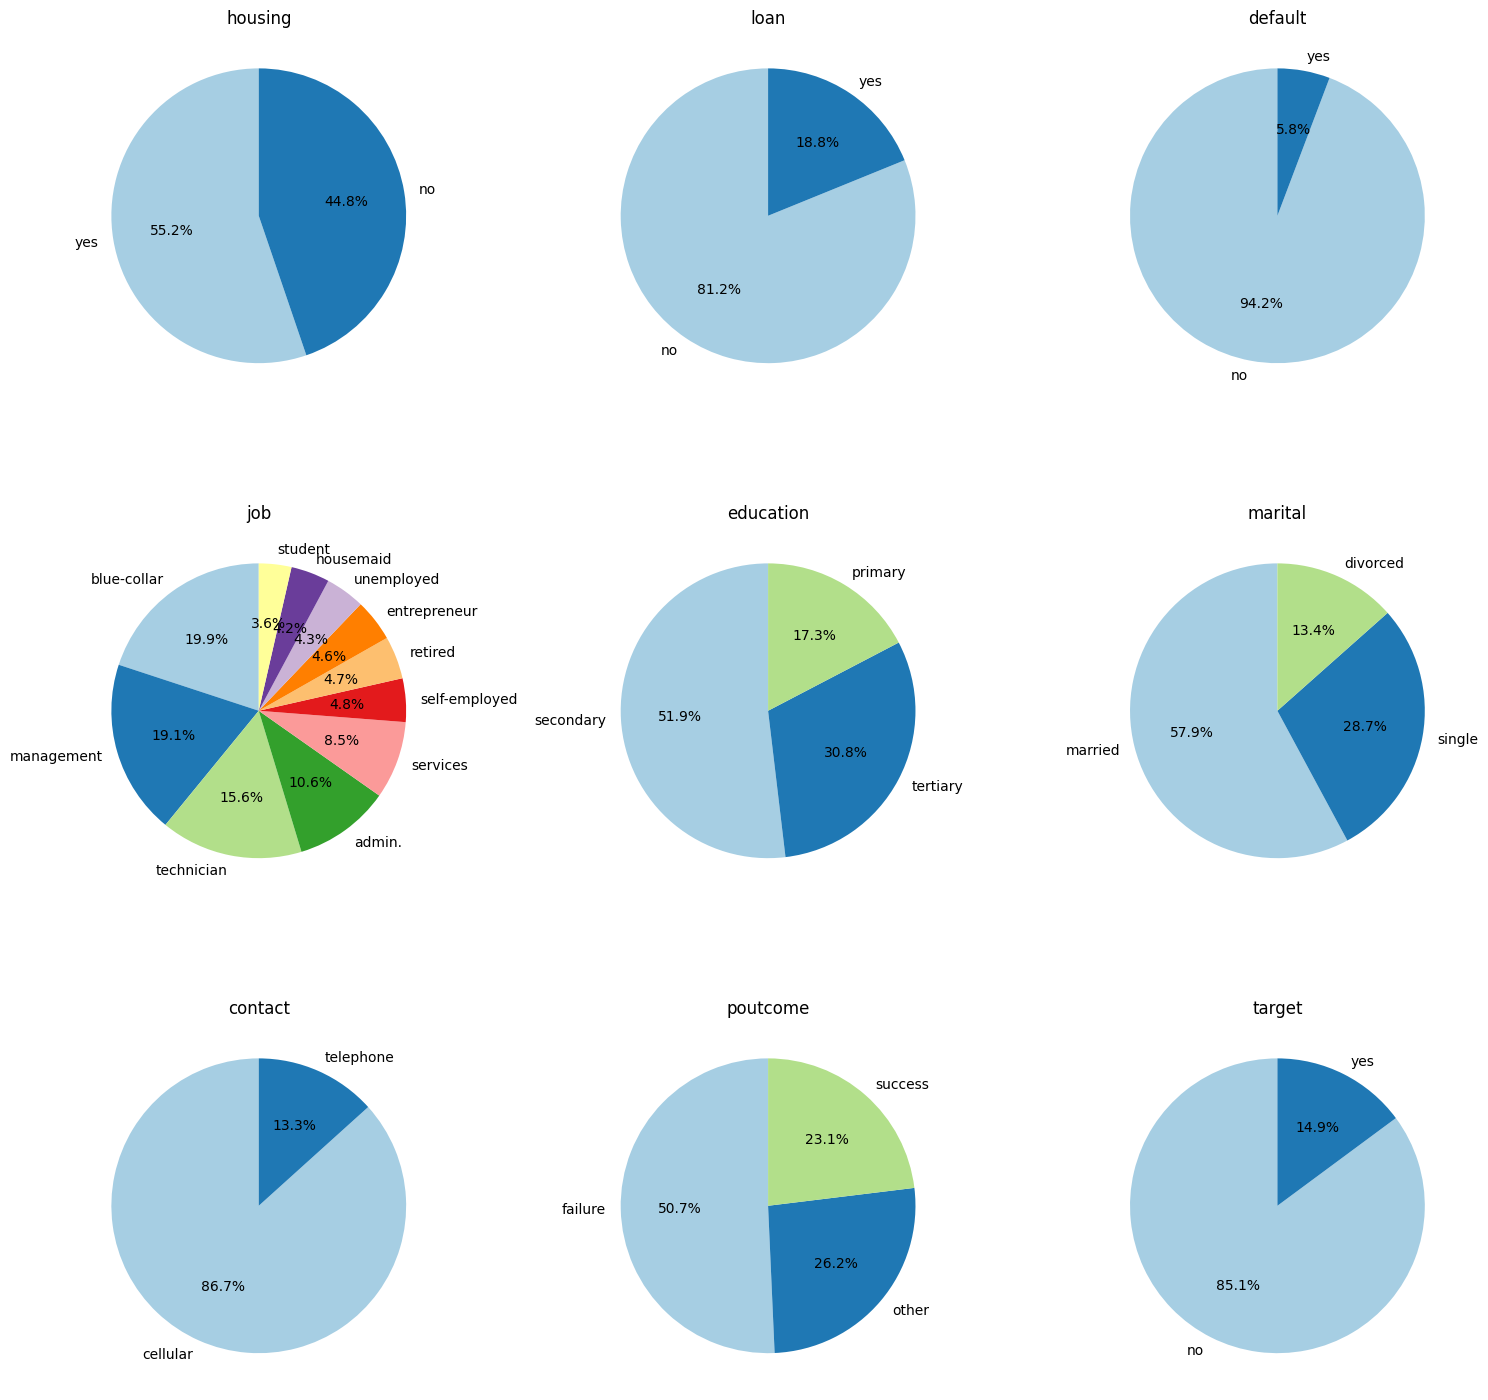

In [11]:
categorical_columns=binary_features+multi_cat_features+['target']
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, column in enumerate(categorical_columns):
    data = df_train[column].value_counts()
    axes[i // 3, i % 3].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[i // 3, i % 3].set_title(column)

plt.tight_layout()
plt.show()

**Housing:**<br>
The house loan has been taken by 55.2% of clients and not taken has been 44.8%.<br>
This means that a large portion of the target segment has other liabilities to be paid, and thus might negatively be affected at the time of taking extra subscriptions or investments.<br>
**Loan:**<br>
Clients have no personal loan accounts but have taken 18.8% as a personal loan account.<br>
**Default:**<br>
As low as 5.8% of the clients have credit in default whereas 94.2% do not.
A low percentage for default may indicate that the client set is slightly more financially conservative in nature and, hence more appealing for some financial products.<br>
**Job:**<br>
The largest portions of job distribution are "blue-collar" (19.9%), "management" (19.1%), and "technician" (15.6%).
The above distribution shows that it has a diverse people in terms of income level as well as financial stability, which could be affecting eligibility and interest for financial products.
<br>**Education:**<br>
The most significant portion of clients is holding "secondary" education at 51.9%, "tertiary" at 30.8%, while the rest is "primary" at 17.3%.
This is a relatively well-educated customer base, which may have implications for how marketing and communication approaches are optimized.
<br>**Marital Status:**
The majority of clients are "married" (57.9%), followed by "single" (28.7%) and "divorced" (13.4%).
This might be suggestive of the presence of many family-oriented clients, which may mean that a majority of the products they might be interested in are family savings plans.
<br>**Contact Method:**
The vast majority has been contacted by cellular (86.7%), whereas a smaller proportionhas been contacted by telephone (13.3%).
<br>**Poutcome (Previous Campaign Outcome):**
The previous campaign outcome shows a failure rate at 50.7%, "other" at 26.2%, and success at 23.1%.
With this high failure rate, then, it presents an opportunity for improvements in the targeting or campaign strategy to produce better results.
<br>**Target (Subscription):**
The target variable shows that 85.1% of clients were not subscribing to a certain service with only 14.9% subscribed
This unevenness suggests that maybe more effective marketing or improved client targeting should be used to convert a higher percentage of clients.

### Histogram of quantitative variables

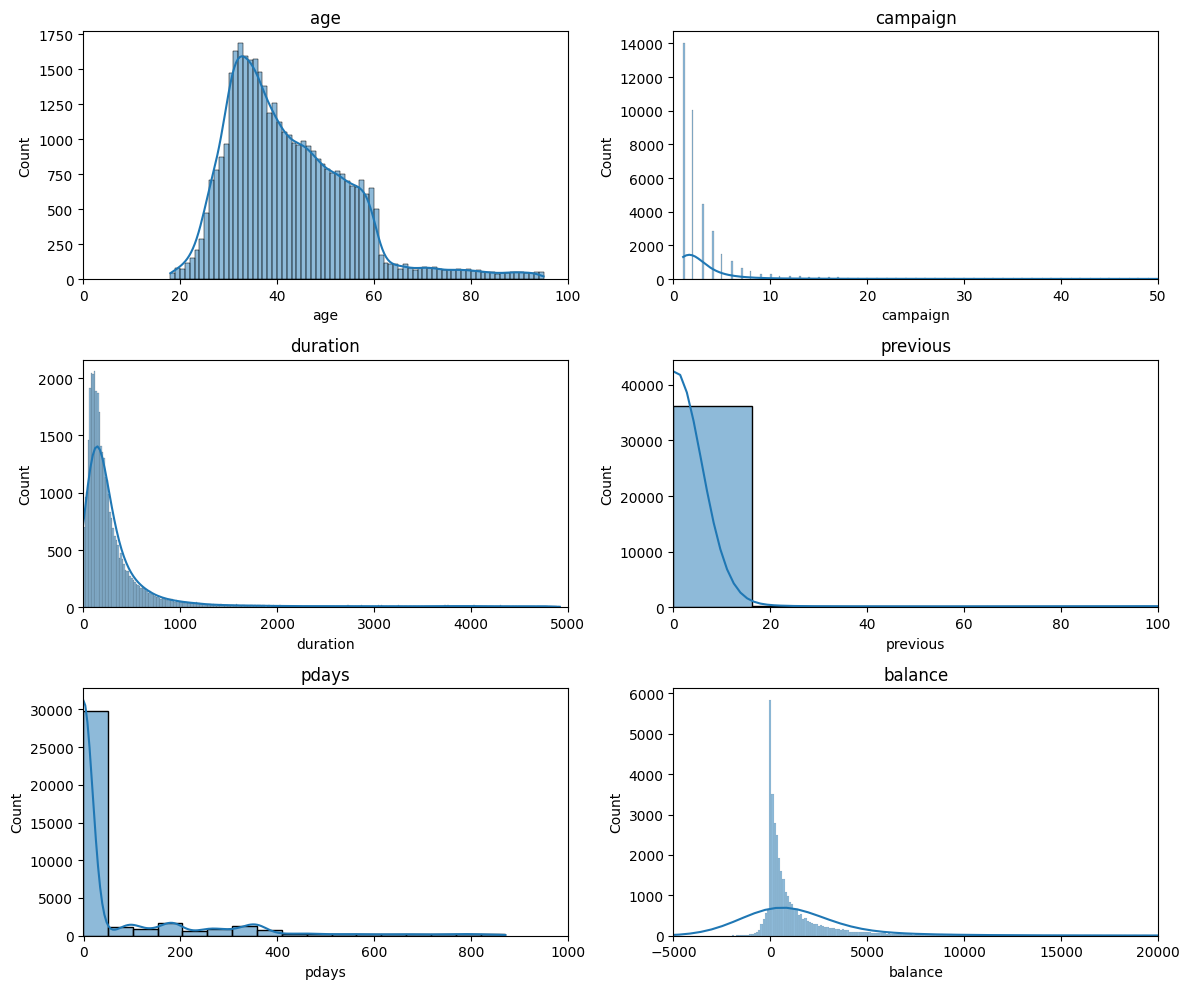

In [12]:
x_limits = {
    'age': (0, 100),
    'balance': (-5000, 20000),
    'duration': (0, 5000),
    'campaign': (0, 50),
    'pdays': (-1, 1000),
    'previous': (0, 100)
}

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, column in enumerate(quantitative):
    sns.histplot(df_train[column], ax=axes[i // 2, i % 2], kde=True)
    axes[i // 2, i % 2].set_title(column)
    
    # Set x-axis limits
    axes[i // 2, i % 2].set_xlim(x_limits[column])

plt.tight_layout()
plt.show()

1.**age** The age distribution is right-skewed, with most clients lying in the 20-40 age range. This tells that most of the bank's clients are young adults or perhaps in their early-to-mid-career range.

2. **Campaign**: This histogram shows the number of contacts in this campaign to each client. Most clients received fewer than 10 contacts, and there's a long tail that says some clients got very many more. This would imply that some clients were targeted significantly during the campaign.

3. **Duration**: The variable of length is also very right-skewed, meaning that the majority of calls are quite short. Because length probably impacts the effectiveness of a marketing campaign, you would be interested in investigating how length relates to target variable.

4. **Pre**: This line shows the number of contacts made to the client before current campaign. Most clients were contacted less than 10 times. This means repeat contacts are not so common.

5. **Pdays**: The distribution for the "pdays" (number of days since the client was last contacted) variable is highly skewed to a few low values, with a large number of cases with a value of 999, suggesting that the client had never been contacted before.

6. **Balance**, it clearly states most of the clients have low to medium balances with some outsides that are high-value. This spread lets one tell that some decent ranges of wealth amongst these clients would easily influence the way they would react to a marketing approach. Many of them has negative balances.

### Correlation matrix to check multicollinearty between numerical features

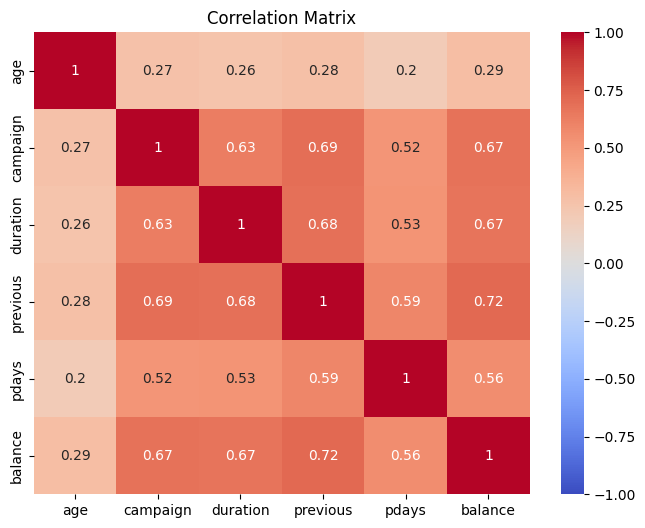

In [13]:
correlation_matrix = df_train[quantitative].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

**Duration and Pdays**: It has a moderate positive correlation with duration in length of contact during the campaign with pdays (number of days since last contact) at 0.59. This might be the case that clients contacted lately had interactions of longer duration or were more interested in that communication, hence the higher engagement level.

**Duration and previous (number of previous contacts)**, the correlation is 0.68; that is, they tend to engage for longer durations if they had more prior contacts. That is likely because engagement with previous clients makes them more responsive.

**Campaign and Previous** : Campaign (contacts in the current campaign) is moderately positively correlated with prior, which means that it is most likely to contact customers who had previous contacts several times in a campaign.

**balance and duration** : has a fair positive correlation  equal to 0.67. This may perhaps imply that people with higher balances are more likely to spend their time in calls, thus leading to increased engagement.

General observations:** All the correlations in the matrix are still moderate (0.68), meaning that none of the variables are highly collinear. This would indicate that **multicollinearity is probably not a big issue in this data set**, so you can include these features without serious redundancy in a classification model.

### Box plots of quantitative variables vs target

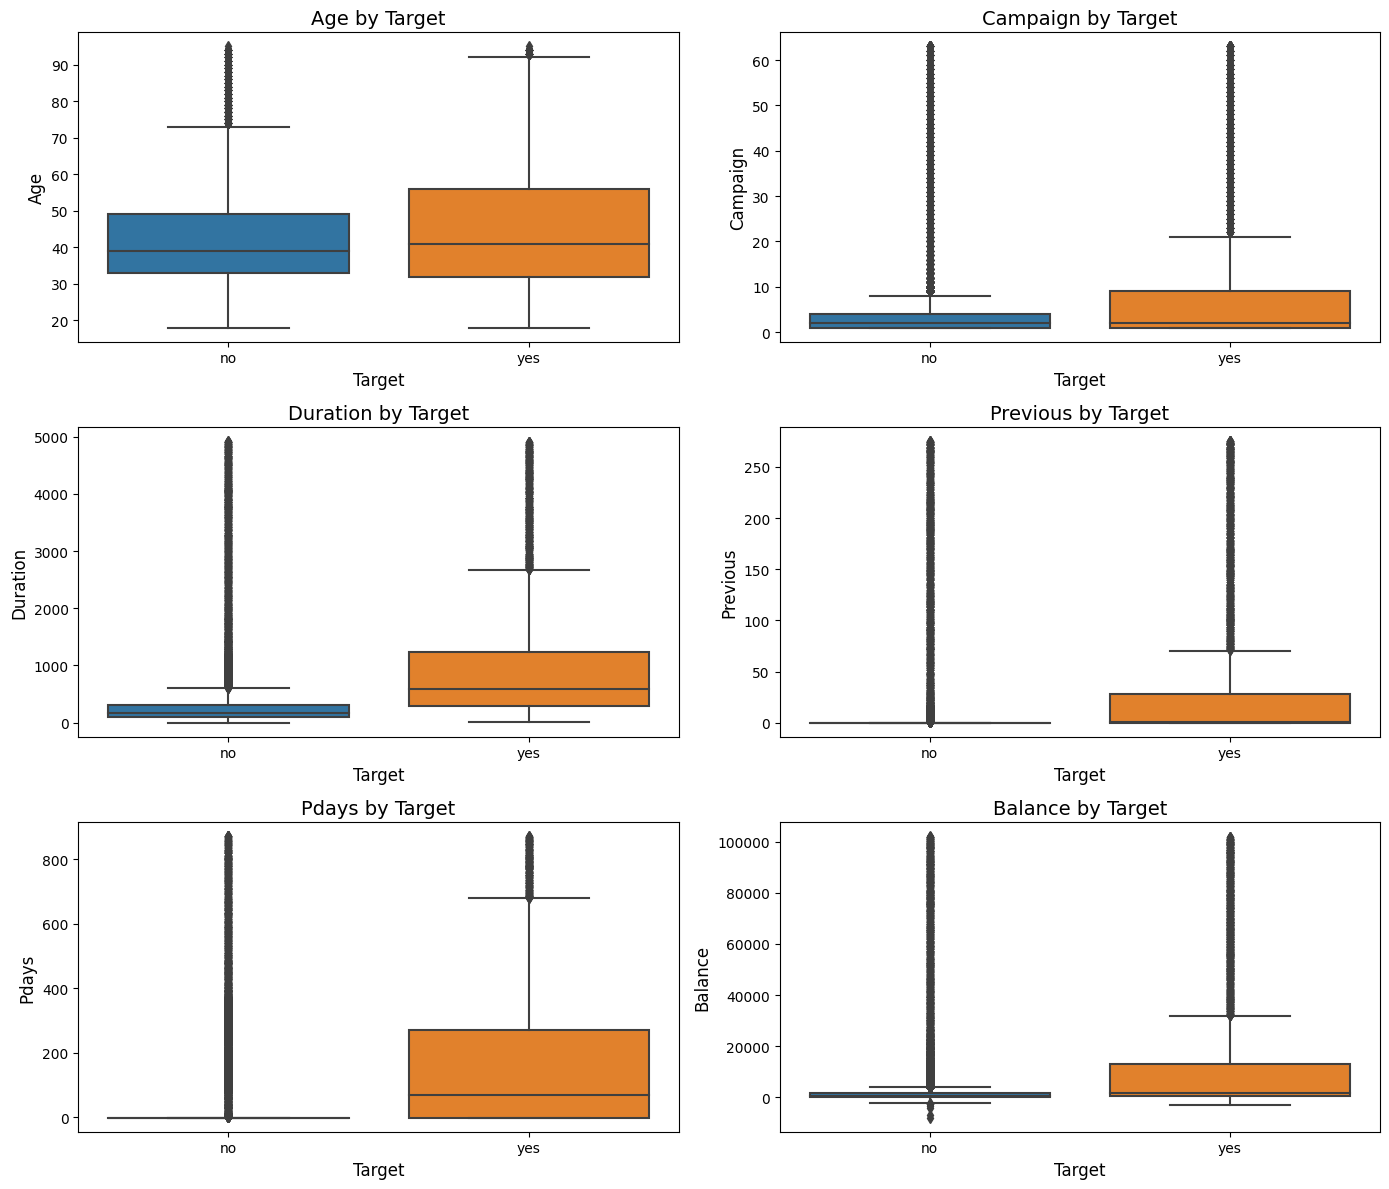

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for i, c in enumerate(quantitative):
    ax = axes[i // 2, i % 2] 
    sns.boxplot(x='target', y=c, data=df_train, ax=ax)
    
    # Set titles and labels
    ax.set_title(f'{c.capitalize()} by Target', fontsize=14)
    ax.set_xlabel('Target', fontsize=12)
    ax.set_ylabel(c.capitalize(), fontsize=12)



plt.tight_layout()
plt.show()

**Age by Target**: Clients who accepted the offer ("yes") have a slightly higher median age as compared to those who did not ("no"). This could mean that older clients are marginally more responsive to the marketing campaign, though not too pronounced.

**Target vs Campaign**: Contacts in the current campaign are relatively fewer in the case of clients who accepted the offer. This can be interpreted as possibly fewer contacts are more effective, say due to reducing annoyance or fatigue with repeated contacts.

**Target vs Duration**: Clients who accept the offer have far longer call durations. That is a very robust indication that call duration positively correlates with conversion. The long calls might merely indicate that the client is much more interested or involved.

**Previous by Target**: Respondents who accepted the offer had, on average, more prior contacts than those who did not. This would suggest that an earlier contact history might be influencing the conversion outcomes.

**Targetvs pdays**: Customers with the "yes" result have on average higher values of pdays-days since last contact.

**Balance by Target:** An increase in account balances correlates with responses. Therefore, it can be inferred that clients who are better off would respond more to the campaign, either because they are becoming more financially stable or because they are interested in investment or saving options.

### Stacked bar plots of categorical variables vs target

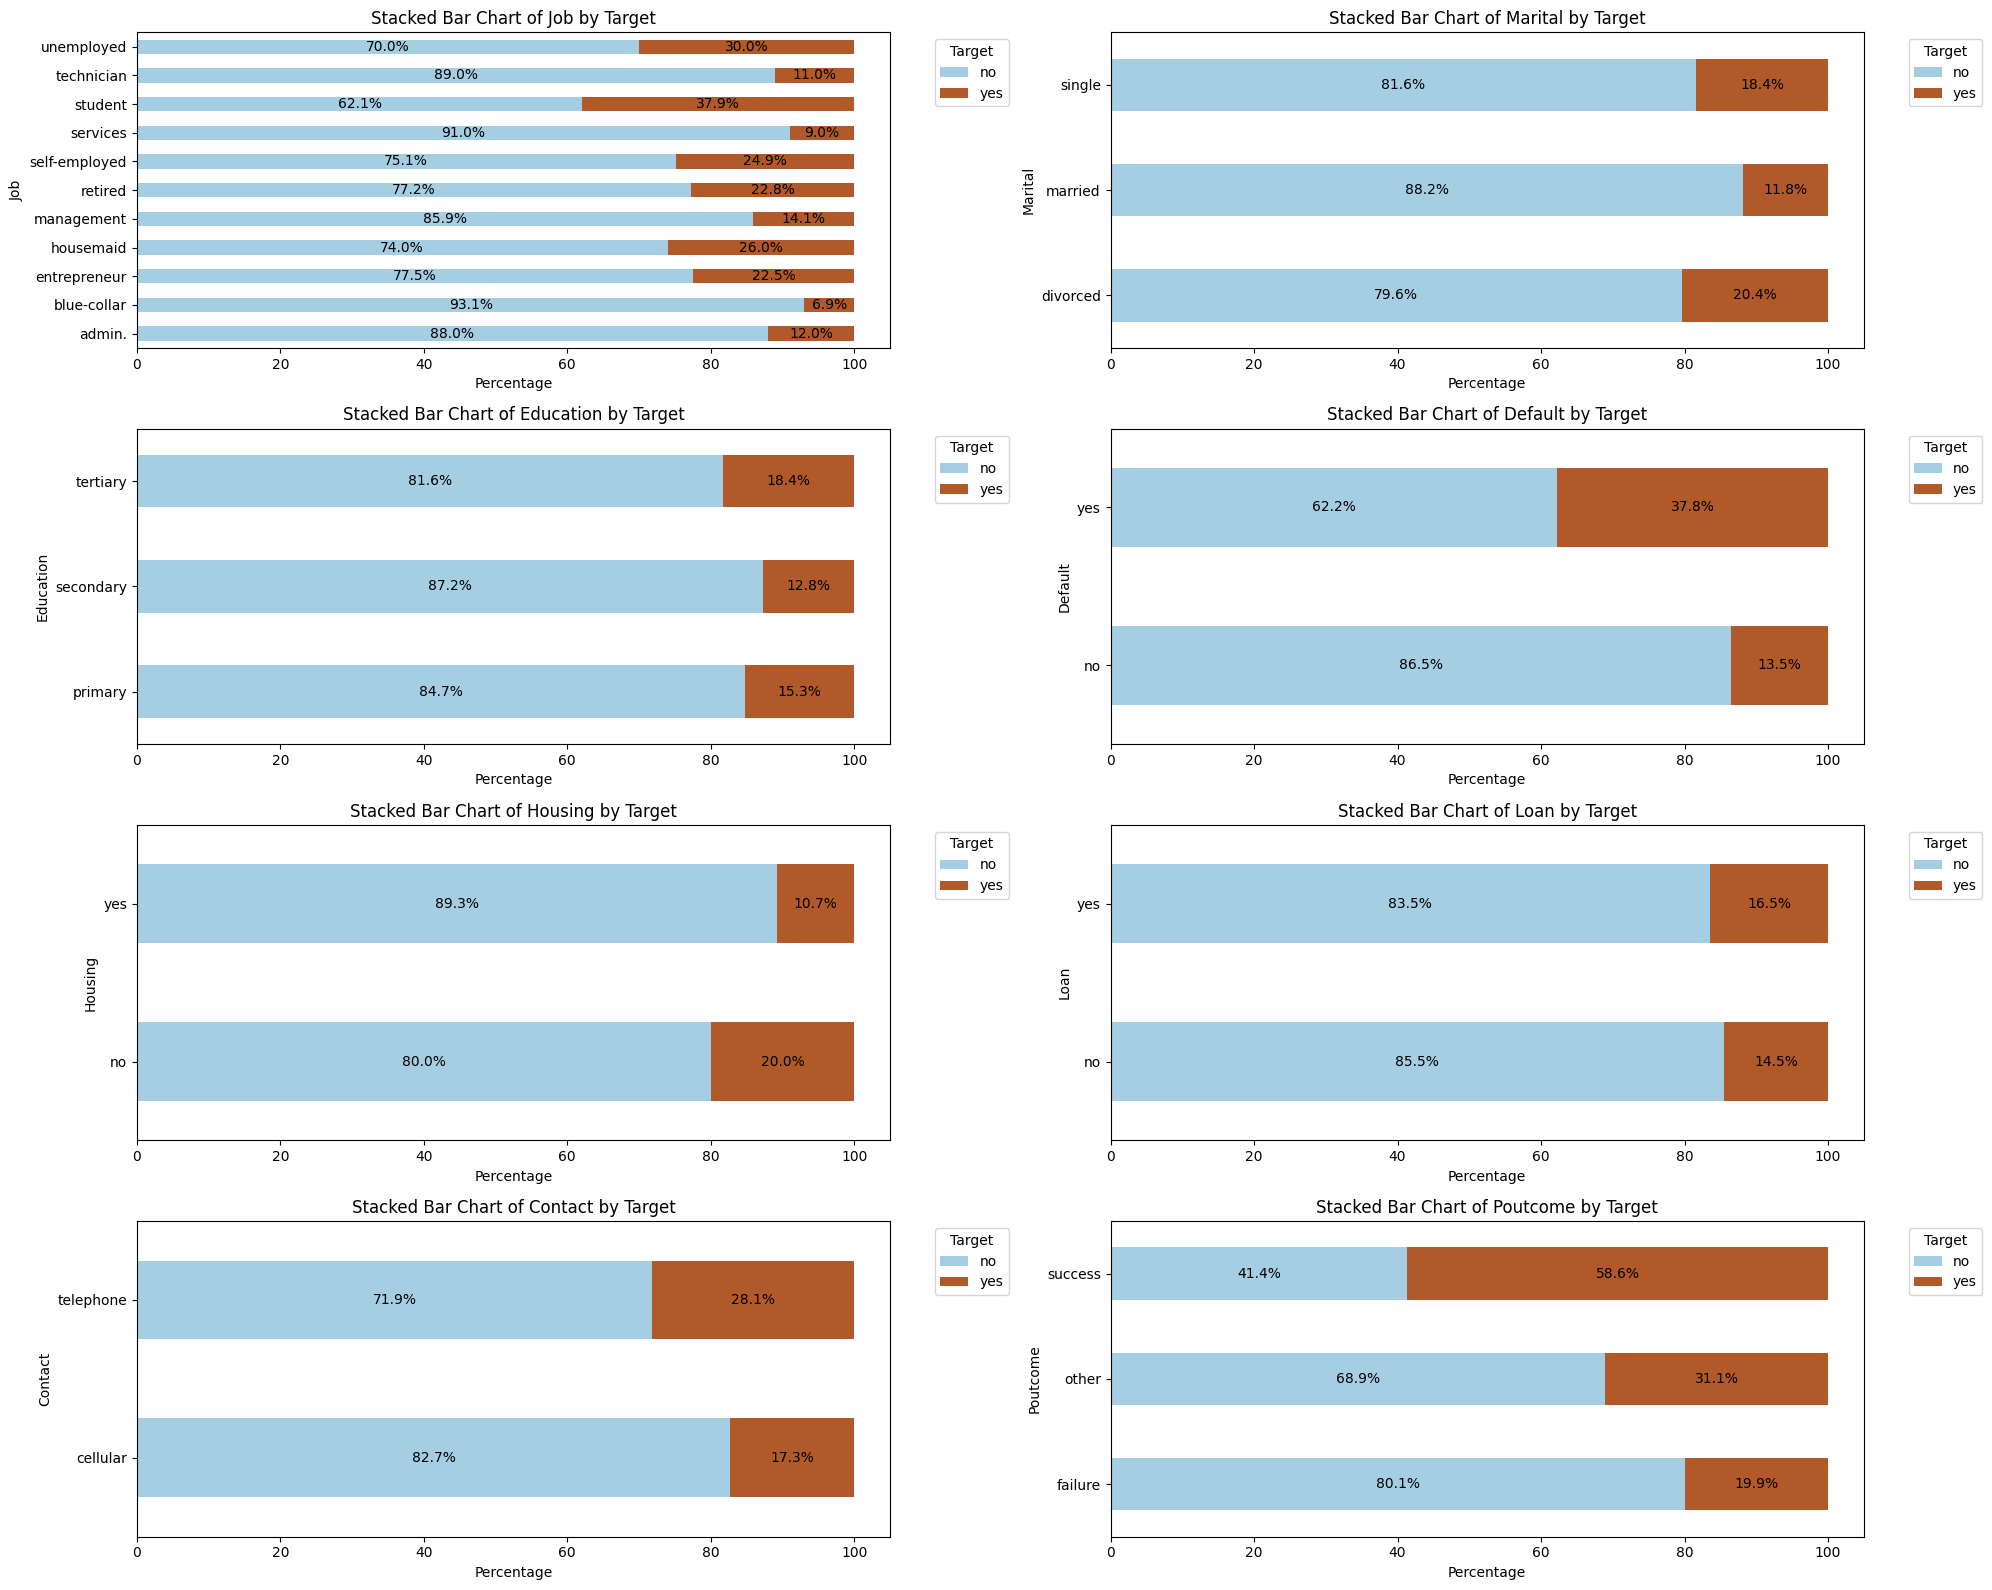

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 2, figsize=(20, 16))  # Adjusted for 8 qualitative columns

qualitative_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']


for i, outer_column in enumerate(qualitative_columns):
    inner_column = 'target'  

   
    grouped_data = pd.crosstab(df_train[outer_column], df_train[inner_column])
    grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

  
    ax = axes[i // 2, i % 2]  
    grouped_data_percentage.plot(kind='barh', stacked=True, ax=ax, colormap='Paired') 

    ax.set_title(f'Stacked Bar Chart of {outer_column.capitalize()} by {inner_column.capitalize()}', fontsize=12)
    ax.set_ylabel(outer_column.capitalize())  # Y-axis is now the qualitative column
    ax.set_xlabel('Percentage')  # X-axis shows the percentage

    for j in range(grouped_data_percentage.shape[0]): 
        cumulative_height = 0
        for k in range(grouped_data_percentage.shape[1])
            percentage = grouped_data_percentage.iloc[j, k]
            if percentage > 0: 
                ax.text(cumulative_height + percentage / 2, j, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)
            cumulative_height += percentage

   
    ax.legend(title=inner_column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


Yes! Here are the results restated in simpler, more intuitive words:

1. **Occupation**:
   People working at blue-collar jobs have a lower chance of saying 'yes', while Students have a higher chances.

2. **Marital Status**:
   Divorced persons have a relatively greater chance of saying yes as compared with those who are married or singles, presumably for the simple reason that they incur fewer commitments regarding money.

3. **Educational Level**
    People at the tertiary level of education tend to say yes in contrast to those at the primary level of education, due to probable less financial security.

4.  **Default**
      People without a record of default, that is with no outstanding debt, will be much more likely to say yes therefore this variable can be considered one of the strong predictors for success.

5.  **Housing Loan:**
     In the absence of a housing loan, people are more prone to say yes. This may indicate that not owning a house is related to better financial health.
 
6. **Personal Loan**:
      Similar to that of housing loans, people without a personal loan have a higher likelihood of saying yes. It means that fewer liabilities increase the possibility of achieving the target.

7. **Contact Method**
    People reached by telephone phones are more likely to say yes compared to those who are contacted by cellular, and hence outreach by telephones is likely to be more effective.

8.  Outcome of Previous Campaign  :
    They are much more likely to say yes again compared to those people who had a failed outcome in previous campaigns and therefore, past success often predicts future success.

Such factors as job type, education, financial obligation, and past campaign results appear to be of great significance regarding whether a given person will attain the desired outcome.

### Splitting the last contact date into year, day, month

In [16]:
df=df_train.copy()
df['last contact date'] = pd.to_datetime(df['last contact date'])
df['day'] = df['last contact date'].dt.day
df['month'] = df['last contact date'].dt.month
df['year'] = df['last contact date'].dt.year

Scatterplot of duaration and campaign based on month o last contact date

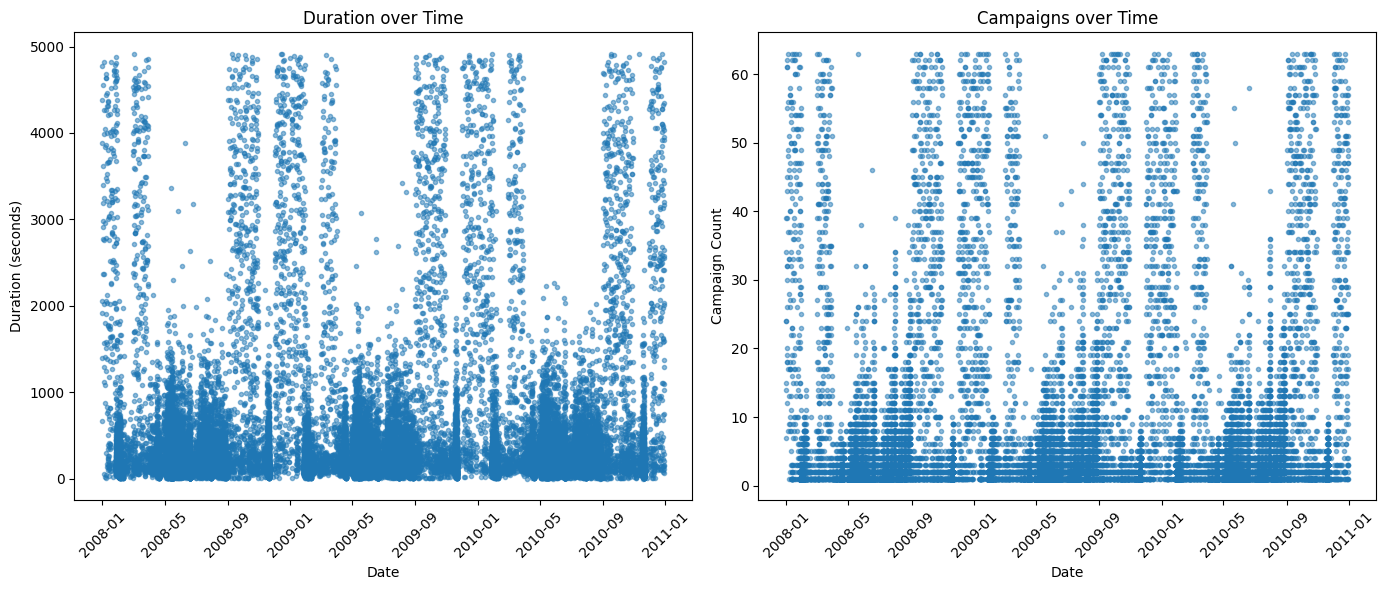

In [17]:

plt.figure(figsize=(14, 6))

# Plot total duration over time
plt.subplot(1, 2, 1)
plt.plot(df['last contact date'], df['duration'], '.', alpha=0.5, label='Duration per Contact')
plt.title('Duration over Time')
plt.xlabel('Date')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)

# Plot campaign count over time
plt.subplot(1, 2, 2)
plt.plot(df['last contact date'], df['campaign'], '.', alpha=0.5, label='Campaign Count per Contact')
plt.title('Campaigns over Time')
plt.xlabel('Date')
plt.ylabel('Campaign Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The two scatter plots suggest information that may be understood from the campaigns' duration and frequency over time. Here are the details for each:

1. **Durational Trend Over Time**:
   This plot shows the durations of each contact in terms of time.
   There are several contacts with durational values under 1,000 seconds, while only a few are at longer endcies.
   From May to sptember of each year there is a cluster of points showing many customers have contacted during this time but duration was less. Whereas from september to january, people was contacted for more duration 
 
2. **Campaigns over Time**
     This graph shows the total number of campaign contacts made over time
     The scatter plot has regular intervals with denser periods, which may suggest that campaigns were released in waves or batches.
     There are also evidential patterns of data spread across certain periods of time, indicating periods at which activity in the campaign was high, possibly during may to september

Line plot of number of clients whop said 'yes' baed n last contact date

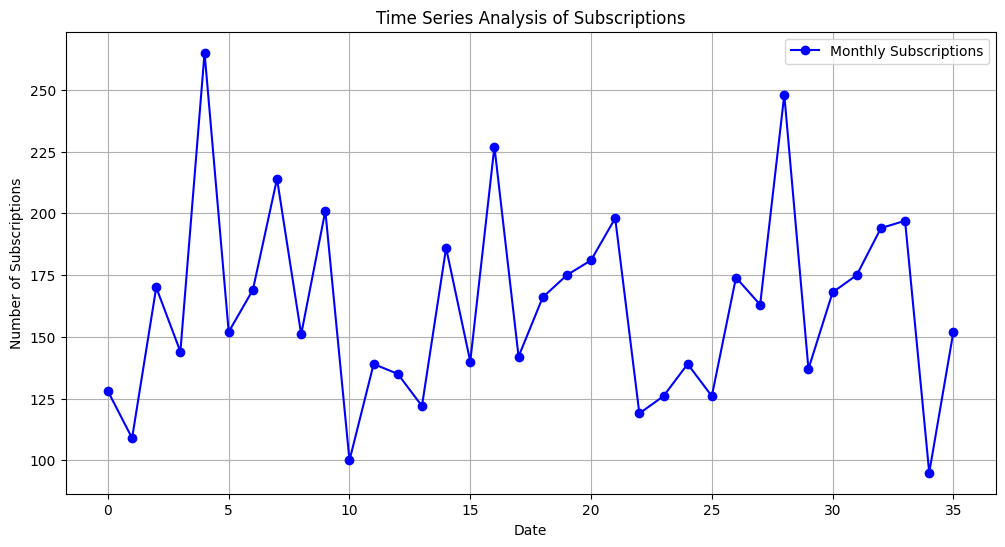

In [18]:

df_yes = df[df['target'] == "yes"]

# Aggregate monthly subscriptions
monthly_subscriptions = df_yes.groupby(['year','month']).size().reset_index()
# # Plotting the time series for subscriptions
plt.figure(figsize=(12, 6))
plt.plot(monthly_subscriptions.index, monthly_subscriptions[0], marker='o', color='b', label='Monthly Subscriptions')
plt.title("Time Series Analysis of Subscriptions")
plt.xlabel("Date")
plt.ylabel("Number of Subscriptions")
plt.legend()
plt.grid(True)
plt.show()


This plot displays the count of subscriptions versus time, which captures month-by-month variability.
The curves suggest peaks and troughs, thus very clearly showing the seasonal behavior. The spikes imply times when there had been better periods of subscription success from may to september and there is a drop drom october
There is much fluctuation throughout the period with regular peaks, suggesting that some times of the year experience a higher rate of response.

### Bar plot no of subscriptions bsed on  the month of last contact date

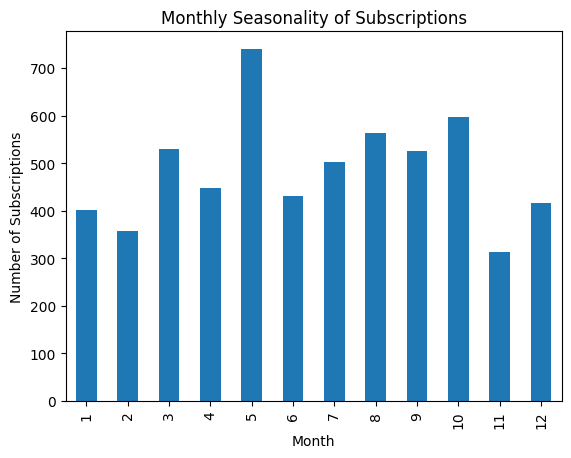

In [19]:
monthly_seasonality = df_yes.groupby('month').size()
monthly_seasonality.plot(kind='bar', title="Monthly Seasonality of Subscriptions", xlabel='Month', ylabel='Number of Subscriptions')
plt.show()



This bar plot highlights the monthly distribution of successful subscriptions.
Some months, particularly May and August, show significantly higher subscription counts, which suggests that campaigns in these months were particularly effective.
Other months, like January and July, show lower subscription rates, possibly indicating periods with reduced campaign activity or lower customer interest.

# Handling Missing Values

### Checking the number of missing values of each column in train data

In [20]:
null_values = df_train.isnull().sum()
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64


### Checking the number of null values of each column in test data

In [21]:
null_values = df_test.isnull().sum()
print("Number of null values in each column:")
print(null_values)


Number of null values in each column:
last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64


There are so many missing values in job, eduction ,contact and poutcome column. We cannot discard the columns as it was clear from EDA that these columns strongly affect the target. Since they are categorical, so we fill the missing values with their corresponding modes.

### Filling missing values with unknown value in each column of train and test data

In [22]:
imputer = SimpleImputer(strategy="constant", fill_value="unknown")
df_train = pd.concat([pd.DataFrame(imputer.fit_transform(df_train.drop(["target"],axis=1)),columns=df_train.columns[:-1]),df_train['target']], axis=1)
df_test = pd.DataFrame(imputer.transform(df_test),columns=df_train.columns[:-1])

Tried imputing with mode value but didnt help much

In [23]:
# imputer = SimpleImputer(strategy="most_frequent")
# df_train[:] = imputer.fit_transform(df_train)
# df_test[:] = imputer.transform(df_test)

# Removing Outliers

From Histograms of Quantitative Variables, we have seen that the there are so many outliers, So we need to get rid of them. We used the IQR method to find the upper and lower bounds. 
<br>
lower_bound = Q1 - 1.5 * IQR <br>
Upper_bound = Q3 + 1.5 * IQR
<br>
Then we clipped the outler values to this upper and lower bounds

In [24]:
quantitative_columns = ['age', 'balance', 'duration', 'campaign']

for c in quantitative_columns:
    # Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_train[c].quantile(0.25)
    Q3 = df_train[c].quantile(0.75)
    
    IQR = Q3 - Q1
    
 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
   

    df_train[c] = df_train[c].clip(lower=lower_bound, upper=upper_bound)


In [25]:
binary_features=['housing','loan','default']
multi_cat_features=['job','education','marital','contact','poutcome']
quantitative=['age','campaign','duration','previous','pdays','balance']

# Encoding the categorical variables of both test and train data

In [26]:

X = pd.DataFrame()


label_encoder = LabelEncoder()
for col in binary_features + multi_cat_features:
    X[col] = label_encoder.fit_transform(df_train[col])

X = pd.concat([X.reset_index(drop=True), df_train[quantitative].reset_index(drop=True)], axis=1)

# Encode the target variable
y = label_encoder.fit_transform(df_train['target'])


In [27]:
X_test = pd.DataFrame()


label_encoder = LabelEncoder()
for col in binary_features + multi_cat_features:
    X_test[col] = label_encoder.fit_transform(df_test[col])


X_test = pd.concat([X_test.reset_index(drop=True), df_test[quantitative].reset_index(drop=True)], axis=1)


Creating a column Transformer to scale the numerical features with Standard scalar

In [28]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), quantitative)
    ]
)

In [29]:
X.shape,X_test.shape


((39211, 14), (10000, 14))

# Splitting the train data into train and validation data

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Class Distribution of target column in the train data

In [31]:
pd.Series(y_train).value_counts()

0    25067
1     4341
Name: count, dtype: int64

There is a significant class imbalance, with the number of instances in class 1 being less than half of those in class 0 When dealing with imbalanced classes in a dataset, where one class (say, class 1) is significantly less than the other (class 0), the model may be biased towards the majority class. To ensure the model learns to properly identify both classes, you need to handle the class imbalance.

# Handing the class imbalance of train data
First, we downsample from class 0 by selecting a subset of instances such that the number of instances in class 0 becomes equal to the number of instances in class 1 plus 10,000. Then, we apply SMOTE to oversample class 1, increasing its size to match the total number of instances in class 0 after downsampling.

### Downsampling 

In [32]:
df_combined = pd.concat([X_train.reset_index(), pd.Series(y_train).reset_index()], axis=1)
print("Class distribution before downsampling:")
print(df_combined[0].value_counts())

# Downsampling
df_no = df_combined[df_combined[0] == 0]
df_yes = df_combined[df_combined[0] == 1]

# Randomly sample from the majority class (no)
df_no_downsampled = df_no.sample(n=len(df_yes)+10000, random_state=42)

# Combine downsampled majority class with minority class
df_balanced = pd.concat([df_yes, df_no_downsampled])


df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


print("\nClass distribution after downsampling:")
print(df_balanced[0].value_counts())

Class distribution before downsampling:
0
0    25067
1     4341
Name: count, dtype: int64

Class distribution after downsampling:
0
0    14341
1     4341
Name: count, dtype: int64


In [33]:
X_train = df_balanced.iloc[:, :-1]  # Select all rows and all columns except the last one
y_train = df_balanced.iloc[:, -1]   # Select all rows and only the last column

### SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [35]:
X_train_res.drop(columns=["index"],inplace=True)

In [36]:
y_train_res.value_counts()

0
1    14341
0    14341
Name: count, dtype: int64

Now the classes are balanced. so we can now fit our models

In [37]:
X_train_res = X_train_res.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)
X_val= X_val.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)
X_test= X_test.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtypes == 'object' else col)

# Modelling the data

In [38]:
models = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
     'perceptron':Perceptron(),
    'naive_bayes':GaussianNB(),
    "hgb":HistGradientBoostingClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGB':XGBClassifier()
    
}


### Fitting each model and comparing them 

In [39]:
model_names = []
accuracy_scores = []
f1_macro_scores = []

In [40]:
for model_name, model in models.items():
    print(f"Fitting {model_name}...")

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),       
         ('classifier', model)                   
    ])
    pipeline.fit(X_train_res, y_train_res)

    y_pred = pipeline.predict(X_val)  

    accuracy = accuracy_score(y_val, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    f1_macro = f1_score(y_val, y_pred, average='macro')
    print(f"f1 macro score: {f1_macro}")
    print(classification_report(y_val,y_pred))
    
    model_names.append(model_name)
    accuracy_scores.append(accuracy)
    f1_macro_scores.append(f1_macro)
    print("-" * 30)

Fitting SVC...
SVC Accuracy: 0.8004
f1 macro score: 0.7073848863337011
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      8317
           1       0.42      0.78      0.54      1486

    accuracy                           0.80      9803
   macro avg       0.68      0.79      0.71      9803
weighted avg       0.87      0.80      0.82      9803

------------------------------
Fitting LogisticRegression...
LogisticRegression Accuracy: 0.7974
f1 macro score: 0.6904150388699413
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      8317
           1       0.40      0.69      0.51      1486

    accuracy                           0.80      9803
   macro avg       0.67      0.75      0.69      9803
weighted avg       0.86      0.80      0.82      9803

------------------------------
Fitting perceptron...
perceptron Accuracy: 0.7369
f1 macro score: 0.6423913000582526
              precision    

In [41]:
X_train_res = X_train_res.apply(lambda col: pd.to_numeric(col, errors='coerce').astype('float64') if col.dtypes == 'object' else col)
X_val= X_val.apply(lambda col: pd.to_numeric(col, errors='coerce').astype('float64') if col.dtypes == 'object' else col)
X_test= X_test.apply(lambda col: pd.to_numeric(col, errors='coerce').astype('float64') if col.dtypes == 'object' else col)

# Plotting the performance of each model based on accuracy and f1 macro score

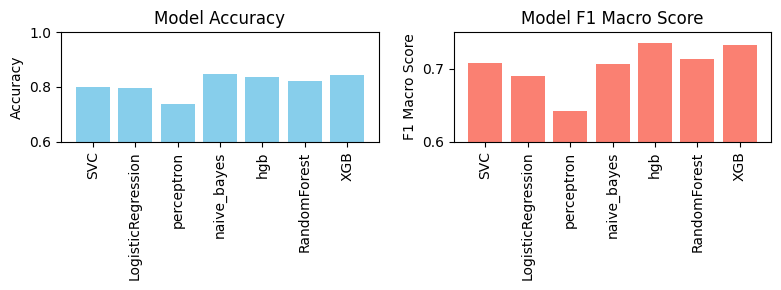

In [42]:
plt.figure(figsize=(8, 3))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title('Model Accuracy')
plt.ylim([0.6, 1])
# F1 Macro Score plot
plt.subplot(1, 2, 2)
plt.bar(model_names, f1_macro_scores, color='salmon')
plt.ylabel('F1 Macro Score')
plt.title('Model F1 Macro Score')
plt.xticks(rotation=90)
plt.ylim([0.6, 0.75])
plt.tight_layout()
plt.show()

Among the models tested,  Random Forest , HistGradientBoostingHistGradientBoosting and XGBoost provided the best overall performance, both achieving high accuracy.
In contrast, Perceptron had the lowest performance, with an accuracy of just 73.69% and a poor F1 score of 0.642, indicating it struggled with both precision and recall. SVC and Logistic Regression had similar results, with good performance for class 0 but weaker precision and recall for class 1, resulting in lower overall F1 scores.

# Fitting the 3 final Models : Tuning the Hyperparameters

### RandomForest Classifier

In [52]:
randomforest_clf = RandomForestClassifier(random_state=42)
pipeline = Pipeline(steps=[
 
    ('rf', randomforest_clf)
])
grid_params_rf = [{
    'rf__criterion': ['gini', 'entropy'],
    'rf__min_samples_leaf': [20, 40],             # Reduced range to key values
    'rf__max_depth': [25, 30],              # Removed intermediate values
    'rf__min_samples_split': [3, 5],              # Reduced to two commonly used values
    'rf__n_estimators': [100, 150],               # Fewer estimator options
    'rf__max_features': ['sqrt', 'log2'],         # Removed None to focus on square root and log2
                       
}]
rand_search = RandomizedSearchCV(pipeline ,param_distributions=grid_params_rf,
                     scoring='f1_macro', cv=7,verbose=0, random_state=42)
rand_search.fit(X_train_res, y_train_res)

print("Best Parameters:", rand_search.best_params_)
print("Best F1 Macro Score:", rand_search.best_score_)

y_pred = rand_search.best_estimator_.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
f1_macro = f1_score(y_val, y_pred, average='macro')
print(f"Test Set Accuracy: {accuracy}")
print(f"Test Set F1 Macro Score: {f1_macro}")



Best Parameters: {'rf__n_estimators': 150, 'rf__min_samples_split': 3, 'rf__min_samples_leaf': 20, 'rf__max_features': 'log2', 'rf__max_depth': 30, 'rf__criterion': 'gini'}
Best F1 Macro Score: 0.8704118885968326
Test Set Accuracy: 0.8338263796796899
Test Set F1 Macro Score: 0.7383349070458214


### XGBoost Model 

In [53]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='auc')
pipeline = Pipeline(steps=[
 
    ('classifier', xgb_clf)
])

param_grid = {
    "classifier__learning_rate": [0.1, 0.01],
    "classifier__gamma": [0, 0.01, 0.1, 0.3],
    "classifier__max_depth": [2, 3, 4, 5],
    "classifier__colsample_bytree": [0.3, 0.6, 0.8, 1.0],
    "classifier__subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
    "classifier__reg_alpha": [0, 0.5, 1],
    "classifier__reg_lambda": [1, 1.5, 2, 3, 4.5],
    "classifier__min_child_weight": [1, 3, 5, 7],
    "classifier__n_estimators": [250, 500, 600]
}

rand_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, scoring="f1_macro",
                                 cv=7, verbose=0, random_state=42)


rand_search.fit(X_train_res, y_train_res)

print("Best Parameters:", rand_search.best_params_)
print("Best F1 Macro Score:", rand_search.best_score_)

y_pred = rand_search.best_estimator_.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
f1_macro = f1_score(y_val, y_pred, average='macro')
print(f"Test Set Accuracy: {accuracy}")
print(f"Test Set F1 Macro Score: {f1_macro}")



Best Parameters: {'classifier__subsample': 0.6, 'classifier__reg_lambda': 3, 'classifier__reg_alpha': 0, 'classifier__n_estimators': 250, 'classifier__min_child_weight': 5, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.1, 'classifier__gamma': 0.3, 'classifier__colsample_bytree': 1.0}
Best F1 Macro Score: 0.8724239344706086
Test Set Accuracy: 0.85188207691523
Test Set F1 Macro Score: 0.7531878298786459


### HistGradient Boosting Classifier

In [54]:
hist_gbc = HistGradientBoostingClassifier(random_state=42)
pipeline = Pipeline(steps=[
 
    ('classifier', hist_gbc)
])
param_grid = {
    "classifier__learning_rate": [0.1, 0.01],         
    "classifier__max_depth": [2, 3, 4, 5],                      
    "classifier__max_leaf_nodes": [15, 31, 63, 127],          
    "classifier__min_samples_leaf": [10, 20, 30, 50, 70],          
    "classifier__l2_regularization": [0.1, 0.5, 1, 2, 4.5],       
    "classifier__max_bins": [255, 512,1024,2048],                     
    "classifier__max_iter": [250, 500],                  
    "classifier__n_iter_no_change": [10, 20, 30],                 
}



rand_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
          
    scoring="f1_macro",       
    cv=7,                     
    random_state=42,
    n_jobs=-1 ,verbose=0               
)

rand_search.fit(X_train_res, y_train_res)
print("Best Parameters:", rand_search.best_params_)
print("Best Score:", rand_search.best_score_)

y_pred = rand_search.best_estimator_.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1_macro = f1_score(y_val, y_pred, average='macro')
print(f"Test Set Accuracy: {accuracy}")
print(f"Test Set F1 Macro Score: {f1_macro}")

Best Parameters: {'classifier__n_iter_no_change': 10, 'classifier__min_samples_leaf': 10, 'classifier__max_leaf_nodes': 31, 'classifier__max_iter': 500, 'classifier__max_depth': 5, 'classifier__max_bins': 255, 'classifier__learning_rate': 0.1, 'classifier__l2_regularization': 4.5}
Best Score: 0.8713998857085048
Test Set Accuracy: 0.8490258084259921
Test Set F1 Macro Score: 0.7499302280302408


### Voting Classifier - Final model made with the best three models along with the best hyperparameters

In [48]:
from sklearn.ensemble import VotingClassifier

# Define base estimators
base_estimators = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    
    ('hist_gradient', HistGradientBoostingClassifier(
        learning_rate=0.1,                 
        max_depth=3,                       
        max_leaf_nodes=63,                 
        min_samples_leaf=30,               
        l2_regularization=1.0,             
        max_bins=255,                      
        max_iter=500,                      
        n_iter_no_change=20,               
        random_state=42
    )),
    
    ('xgboost', XGBClassifier(
        learning_rate=0.1,                 
        gamma=0,                           
        max_depth=3,                       
        colsample_bytree=1.0,              
        subsample=0.6,                     
        reg_alpha=0.5,                     
        reg_lambda=4.5,                    
        min_child_weight=1,                
        n_estimators=600,                  
        random_state=42
    ))
]

# Define Voting Classifier
voting_clf = VotingClassifier(
    estimators=base_estimators,
    voting='soft'
)

voting_clf.fit(X_train_res, y_train_res)
y_pred = voting_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='macro')

print("Voting Classifier Accuracy:", accuracy)
print("Voting Classifier F1 Score (Macro):", f1)

Voting Classifier Accuracy: 0.8502499234928084
Voting Classifier F1 Score (Macro): 0.7518522273768781


We use the voting classifier as the final model

# ROC Curve of the final model

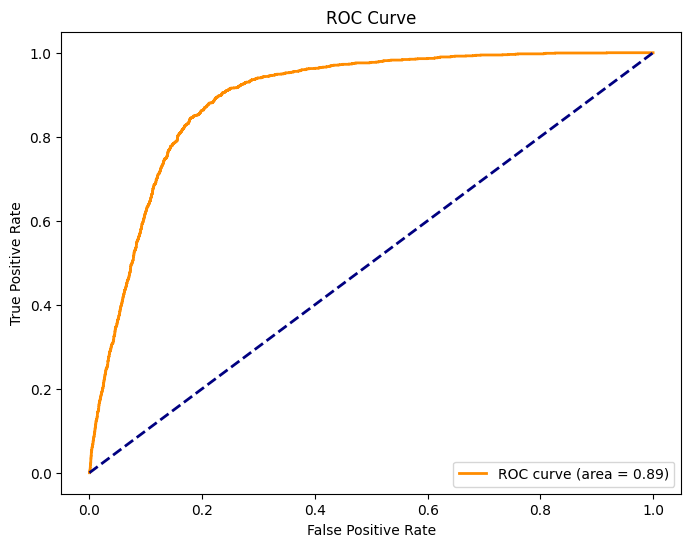

In [49]:
y_proba = voting_clf.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve plots the True Positive Rate (TPR) on the Y-axis against the False Positive Rate (FPR) on the X-axis.
A curve that bows towards the upper-left corner indicates good model performance. Here, the ROC curve shows a clear curve towards the top-left, suggesting that the model has a good balance between sensitivity (true positive rate) and specificity (false positive rate). With an AUC of 0.89, the model is likely effective in distinguishing between the classes, but there is still some room for improvement.

# Confusion matrix of the final model

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1']) 
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classiication Report of the final model

In [ ]:
print("Classification Report:\n", classification_report(y_val, y_pred))

# Predicting the y values for the test data

In [ ]:
y_pred_test = voting_clf.predict(X_test)

In [ ]:
target_col = df_train.iloc[:, -1]
print (target_col)

# Making the submission file

In [ ]:
le = LabelEncoder()
le.fit(target_col)

# Getting the original categories
original_categories = le.classes_

#Transforming numerical predictions back to categories
y_pred_scv = le.inverse_transform(y_pred_test)
submission = pd.DataFrame({"id": range(0,X_test.shape[0]), 
                           "target": y_pred_scv})

submission.to_csv('submission.csv', index = False)

In [ ]:
# Verify the changes


import pandas as pd
import os

# Load your current submission file
# If you don't have a file yet, replace this with your prediction code
submission = pd.read_csv('submission.csv')

# Ensure 'id' is the correct type
submission['id'] = submission['id'].astype(int)

# Ensure 'target' contains only 'yes' and 'no'
valid_targets = ['yes', 'no']
submission['target'] = submission['target'].astype(str).str.lower()
if not submission['target'].isin(valid_targets).all():
    print("Warning: Some target values are not 'yes' or 'no'. Fixing...")
    submission['target'] = submission['target'].map({'1': 'yes', '0': 'no', 'true': 'yes', 'false': 'no'})
    submission['target'] = submission['target'].fillna('no')  # Default to 'no' for any remaining invalid values

# Save the corrected submission file
submission.to_csv('submission.csv', index=False)
print(submission.head())
print(submission.dtypes)
print(f"Unique target values: {submission['target'].unique()}")

# Double-check the file was created
if os.path.exists('submission.csv'):
    print(f"File created successfully. Size: {os.path.getsize('submission.csv')} bytes")
else:
    print("File not created")

# Additional checks
print("\nSubmission shape:", submission.shape)
print("\nMissing values:")
print(submission.isnull().sum())

print("\nFirst few rows:")
print(submission.head())

print("\nLast few rows:")
print(submission.tail())

# Ensure 'id' column is continuous from 0 to 9999
expected_ids = set(range(10000))
actual_ids = set(submission['id'])
if expected_ids == actual_ids:
    print("\nID range is correct")
else:
    print("\nID range mismatch")
    print(f"Missing IDs: {expected_ids - actual_ids}")
    print(f"Extra IDs: {actual_ids - expected_ids}")

# Check if 'target' column contains only valid values
valid_targets = submission['target'].isin(['yes', 'no'])
if valid_targets.all():
    print("\nAll target values are valid")
else:
    print(f"\nInvalid target values found: {submission[~valid_targets]['target'].unique()}")